In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/port_evaluation/data/xlsx/processed.csv')

In [3]:
df['share_of_loitering'] = df['loitering']/(df['encounter']+df['loitering'])
df['more_than_100_encounters'] = df['loitering'] + df['encounter'] > 100

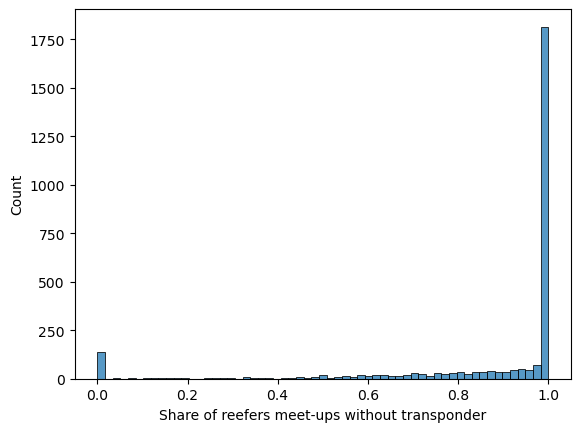

In [4]:
sns.histplot(data = df, x = 'share_of_loitering')
plt.xlabel('Share of reefers meet-ups without transponder')
plt.show()

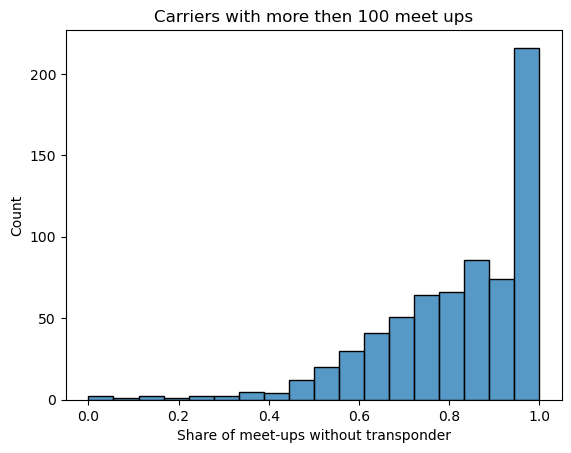

In [24]:
df_filtered = df.loc[df['more_than_100_encounters'] == 1,:]
sns.histplot(data = df_filtered, x = 'share_of_loitering')
plt.xlabel('Share of meet-ups without transponder')
plt.title('Carriers with more then 100 meet ups')
plt.show()

In [14]:
path = '/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/port_evaluation/data/xlsx/gfw_data-v2.xlsx'
port_visits = pd.read_excel(path, sheet_name='carrier_port_visit-v2')
port_visits.head()

,id,type,start,end,lat,lon,vessel.id,vessel.type,vessel.mmsi,vessel.name,...,encounter.encountered_vessel.destination_port.country,encounter.encountered_vessel.destination_port.name,encounter.encountered_vessel.authorizations.authorized,encounter.encountered_vessel.authorizations.unknown,loitering.total_distance_km,loitering.loitering_hours,port.lat,port.lon,port.country,port.name
0,af03d0b85979b8c91ae5ea165d0fd2e0,port,2012-10-24 12:21:05 UTC,2012-10-24 21:07:44 UTC,18.460661,-66.111945,3fe8729f8-80c4-2d9b-70cb-02aa09353f4e,carrier,311295000,DOLE ASIA,...,NaN,NaN,NaN,NaN,NaN,NaN,18.460661,-66.111945,PRI,SAN JUAN
1,76c123fc888c38f8424d444308e74739,port,2012-10-24 10:00:48 UTC,2012-10-26 14:49:48 UTC,8.024300,-76.780133,b3089e7df-fd55-d6e8-2292-e7bb093023fe,carrier,308090000,HELLAS STREAM,...,NaN,NaN,NaN,NaN,NaN,NaN,8.024300,-76.780133,COL,TURBO
2,a3910ba2f8e734f7343fe2c3886e031a,port,2012-10-24 23:02:21 UTC,2012-10-25 16:23:59 UTC,62.777300,6.917326,1c3ee5f35-5189-56ac-07a5-a99a6624b7aa,carrier,311411000,SAMSKIP ICE,...,NaN,NaN,NaN,NaN,NaN,NaN,62.777300,6.917326,NOR,NaN
3,c3bf496236204dead751072c35d5fefc,port,2012-10-24 14:57:38 UTC,2012-10-25 16:49:53 UTC,-16.990203,-72.142333,65032eb47-732f-946e-ea32-03567b0cefd8,carrier,636011106,BALTIC PRIDE,...,NaN,NaN,NaN,NaN,NaN,NaN,-16.990203,-72.142333,PER,MATARANI
4,ef23a729101f8d93679a51697754c7c3,port,2012-10-24 07:15:58 UTC,2012-10-25 09:39:17 UTC,52.874624,158.663179,6fc826893-3007-30a2-8cb3-dea6f5087bc0,carrier,273845620,POGRANICHNIK_ZMEEV,...,NaN,NaN,NaN,NaN,NaN,NaN,52.874624,158.663179,RUS,PETROPAVLOVSK


In [15]:
port_visits.columns

Index(['id', 'type', 'start', 'end', 'lat', 'lon', 'vessel.id', 'vessel.type',
       'vessel.mmsi', 'vessel.name', 'vessel.flag',
       'vessel.origin_port.country', 'vessel.origin_port.name',
       'vessel.destination_port.country', 'vessel.destination_port.name',
       'vessel.authorizations.authorized', 'vessel.authorizations.unknown',
       'median_speed_knots', 'elevation_m', 'distance_from_shore_m',
       'distance_from_port_m', 'regions.rfmo', 'encounter.median_distance_km',
       'encounter.authorization_status', 'encounter.encountered_vessel.id',
       'encounter.encountered_vessel.type',
       'encounter.encountered_vessel.mmsi',
       'encounter.encountered_vessel.name',
       'encounter.encountered_vessel.flag',
       'encounter.encountered_vessel.origin_port.country',
       'encounter.encountered_vessel.origin_port.name',
       'encounter.encountered_vessel.destination_port.country',
       'encounter.encountered_vessel.destination_port.name',
       'encount

In [18]:
vessels = df['id'].unique()
port_visits_known_ships = port_visits.loc[port_visits['vessel.id'].isin(vessels), :]
len(port_visits_known_ships)

382472

In [35]:
port_vessel_count = port_visits_known_ships.groupby(['port.name', 'vessel.id'])['id'].count().reset_index()
port_vessel_with_label = port_vessel_count.merge(df, how='left', left_on='vessel.id', right_on='id', suffixes=('_port', '_carrier'))
share_of_loitering = port_vessel_with_label.groupby('port.name')['share_of_loitering'].mean().reset_index()
number_of_bad_visits = port_vessel_with_label.groupby('port.name')['label'].sum().reset_index()
share_of_bad_visits = port_vessel_with_label.groupby('port.name')['label'].mean().reset_index()
# ports_summary = port_visits_known_ships.merge(share_of_loitering, on='port.name', how='left')
ports_summary = share_of_loitering.merge(number_of_bad_visits, on='port.name', how='left')
ports_summary = ports_summary.merge(share_of_bad_visits, on='port.name', how='left', suffixes=('_absolute_count', '_avg'))

In [39]:
ports_summary.sort_values('label_absolute_count', ascending=False).head(10)

,port.name,share_of_loitering,label_absolute_count,label_avg
480,BUSAN,0.849673,692,0.837772
1963,SINGAPORE,0.915148,550,0.963222
1552,PANAMA CITY,0.962655,463,0.985106
562,COLON,0.964614,450,0.984683
1189,LAS PALMAS,0.968288,427,0.981609
2373,ZHOUSHAN,0.862232,412,0.874735
1712,PUERTO BOLIVAR,0.982370,311,1.000000
211,ABIDJAN,0.967003,309,0.984076
700,EUROPA POINT,0.981289,305,1.000000
2130,TEMA,0.962598,300,0.980392


In [46]:
ports_summary.loc[ports_summary['label_absolute_count'] > 50].sort_values('share_of_loitering', ascending=False).head(10)

,port.name,share_of_loitering,label_absolute_count,label_avg
1714,PUERTO CALDERA,1.000000,79,1.0
2368,ZEEBRUGGE,1.000000,56,1.0
2204,UDDEVALLA,1.000000,67,1.0
1303,MATARANI,0.999730,65,1.0
1575,PEPILLO SALCEDO,0.999493,81,1.0
1560,PARAMARIBO,0.999437,66,1.0
1691,PORTSMOUTH,0.999185,99,1.0
1883,SANTA MARTA,0.999138,151,1.0
1353,MOIN,0.999051,124,1.0
2099,TANCARVILLE,0.999014,64,1.0


In [45]:
ports_summary['share_of_loitering'].mean()

0.8281250779466328

In [47]:
ports_summary.loc[ports_summary['label_absolute_count'] > 50].sort_values('share_of_loitering', ascending=True).head(10)

,port.name,share_of_loitering,label_absolute_count,label_avg
398,BELLINGHAM,0.564415,52,0.536082
2360,YUZHNO-KURILSK,0.644131,53,0.464912
1502,OKTYABRSKIY,0.662608,60,0.461538
1581,PETROPAVLOVSK,0.664472,76,0.487179
1927,SEVERO-KURIL'SK,0.667503,81,0.500000
1133,KORSAKOV,0.711251,74,0.552239
2281,VLADIVOSTOK,0.723916,181,0.628472
1406,NAKHODKA,0.756180,144,0.702439
1756,QINGDAO,0.783827,175,0.717213
664,DUTCH HARBOR,0.784126,129,0.791411


In [48]:
len(ports_summary)

2381

In [49]:
path = '/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/port_evaluation/data/xlsx/gfw_data-v2.xlsx'
encounters = pd.read_excel(path, sheet_name='encounter')
encounters.head()

,event_id,event_type,event_start,event_end,event_lat,event_lon,mpa,eez,rfmo,fao,...,vessel1_type,vessel1_ssvid,vessel2_id,vessel2_flag,vessel2_name,vessel2_type,vessel2_ssvid,medianDistanceKilometers,medianSpeedKnots,encounter_type
0,bb36acd0ef06c619eeca0421d07ae5cd.1,encounter,2022-09-19 14:40:00,2022-09-20 23:50:00,59.1361,164.0261,NaN,5690,"IWC, ACAP, PICES",61,...,fishing,273843020,9e6a50d61-135a-cac1-5572-2064ec9b6184,RUS,KAPITAN KIRICHENKO,carrier,273422240,0.061,0.090,fishing-carrier
1,bb36acd0ef06c619eeca0421d07ae5cd.2,encounter,2022-09-19 14:40:00,2022-09-20 23:50:00,59.1361,164.0261,NaN,5690,"IWC, PICES, ACAP",61,...,carrier,273422240,4858ea8e4-4822-cb70-d4a8-e536ee9bbedc,RUS,XX SYEZD VLKSM,fishing,273843020,0.061,0.090,carrier-fishing
2,bbc225900674c6a9c9d27fcfdb5600d9.1,encounter,2022-09-20 07:00:00,2022-09-20 23:50:00,62.9143,179.4136,NaN,5690,"IWC, PICES, ACAP",61,...,fishing,273240400,f7ebe6fa3-3640-5c7f-17c2-83423449bb1e,RUS,VITALIY SHMYKOV,carrier,273356290,0.049,0.015,fishing-carrier
3,bbc225900674c6a9c9d27fcfdb5600d9.2,encounter,2022-09-20 07:00:00,2022-09-20 23:50:00,62.9143,179.4136,NaN,5690,"PICES, ACAP, IWC",61,...,carrier,273356290,5ddb64d7e-ec33-e20d-7265-c717e3c59313,RUS,AHTIAR,fishing,273240400,0.049,0.015,carrier-fishing
4,30b519732007d7631f6f5fcc84049eee.2,encounter,2022-09-20 15:10:00,2022-09-20 20:30:00,48.7694,140.6118,NaN,5690,"IWC, ACAP, WCPFC, PICES",61,...,fishing,273433540,489bfeb6d-d541-4161-1236-a1d70a89f03d,RUS,DRUZHBA,carrier,273895510,0.022,0.691,fishing-carrier


In [52]:
encounters.loc[encounters['event_start'] >= '2022-01-01', :]
print("Number of encounters in 2022: ",len(encounters))
print("Number of different carriers active in 2022: ", len(encounters.loc[encounters['vessel1_type'] == 'carrier', 'vessel1_id'].unique()))

Number of encounters in 2022:  116400
Number of different carriers active in 2022:  1066
